In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('train.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
x= train[['Pclass','Sex','Fare','SibSp','Parch','Age','Embarked']].copy()
m = x['Age'].mean()
x['Age']=x['Age'].fillna(int(m))
x['Embarked']=x['Embarked'].fillna('N')
y = train['Survived']

In [5]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [6]:
#将标签转化为离散的数字
enc = OrdinalEncoder()
enc.fit(x)
x=enc.transform(x)

In [7]:
x

array([[  2.,   1.,  18., ...,   0.,  28.,   3.],
       [  0.,   0., 207., ...,   0.,  51.,   0.],
       [  2.,   0.,  41., ...,   0.,  34.,   3.],
       ...,
       [  2.,   0., 131., ...,   2.,  38.,   3.],
       [  0.,   1., 153., ...,   0.,  34.,   0.],
       [  2.,   1.,  30., ...,   0.,  42.,   2.]])

In [8]:
#将连续的数字标准化
x=StandardScaler().fit(x).transform(x)

In [9]:
x

array([[ 0.82737724,  0.73769513, -1.24717035, ..., -0.47367361,
        -0.65341594,  0.56273365],
       [-1.56610693, -1.35557354,  1.45116508, ..., -0.47367361,
         0.75417923, -2.00852627],
       [ 0.82737724, -1.35557354, -0.91880149, ..., -0.47367361,
        -0.2862172 ,  0.56273365],
       ...,
       [ 0.82737724, -1.35557354,  0.36612014, ...,  2.00893337,
        -0.04141804,  0.56273365],
       [-1.56610693,  0.73769513,  0.6802121 , ..., -0.47367361,
        -0.2862172 , -2.00852627],
       [ 0.82737724,  0.73769513, -1.07584746, ..., -0.47367361,
         0.20338112, -0.29435299]])

C:\Users\15022\AppData\Local\Temp\ipykernel_6420\3998243078.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_max = train.corr()


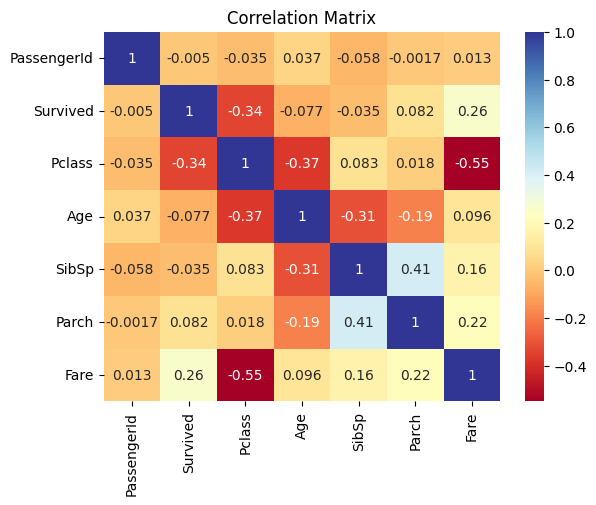

In [10]:
#绘制相关性矩阵
cor_max = train.corr()

import seaborn as sns

sns.heatmap(cor_max, annot=True, cmap="RdYlBu")

# 添加标题
plt.title("Correlation Matrix")

# 显示图形
plt.show()

In [11]:
#交叉验证
from sklearn.model_selection import cross_val_score
xl=[]
yl=[]
for i in range(2,50):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i) #KNN
    scores = cross_val_score(model, x, y, cv=10)
    xl+=[i]
    yl+=[scores.mean()]

AttributeError: module 'sklearn' has no attribute 'neighbors'

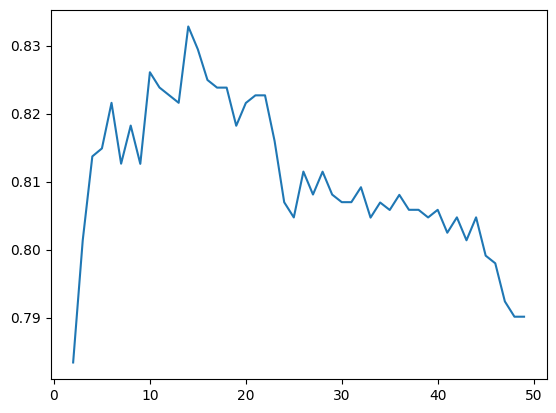

In [ ]:
plt.plot(xl,yl)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8324022346368715